<a href="https://colab.research.google.com/github/lililibin2022/TransferLearning/blob/main/YOLOv8fermenter%20seg%20240120.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## How to Train YOLOv8 Object Detection on a Custom Dataset

In [1]:
!nvidia-smi

Sat Jan 20 07:44:17 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   68C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 701.1/701.1 kB 3.4 MB/s eta 0:00:00


## Install YOLOv8

In [3]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo mode=checks

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 508, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.10/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are ('train', 'val', 'predict', 'export', 'track', 'benchmark').

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of ('detect', 'segment', 'classify', 'pose', 'obb')
                MODE (required) is one of ('train', 'val', 'predict', 'export', 'track', 'benchmark')
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at ht

## Train YOLOv8 Model on Custom Dataset

In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="KambJHvvNRVwsQ1xhopi")
project = rf.workspace("fafu").project("liquid_spawn_segmentation_data")
dataset = project.version(3).download("yolov8")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.9/69.9 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.2 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler 

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.3, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to liquid_spawn_segmentation_data-3 in yolov8:: 100%|██████████| 4520/4520 [00:01<00:00, 2446.33it/s]


In [6]:
# Load a model
model = YOLO('yolov8l-seg.yaml')  # build a new model from YAML
model = YOLO('yolov8l-seg.pt')  # load a pretrained model (recommended for training)
model = YOLO('yolov8l-seg.yaml').load('yolov8l-seg.pt')  # build from YAML and transfer weights

# # Train the model
# model = YOLO("yolov8l-seg.pt")

model.train(data='/content/liquid_spawn_segmentation_data-3/data.yaml', epochs=120)

Transferred 657/657 items from pretrained weights
Ultralytics YOLOv8.1.3 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8l-seg.yaml, data=/content/liquid_spawn_segmentation_data-3/data.yaml, epochs=120, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_tx

100%|██████████| 755k/755k [00:00<00:00, 16.8MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.block.C2f             [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.block.C2f             [256, 256, 6, True]           
  5                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256, 512, 3, 2]              
  6                  -1  6   8396800  ultralytics.nn.modules.block.C2f             [512, 512, 6, True]           
  7                  -1  1   2360320  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 77.9MB/s]


AMP: checks passed ✅


train: Scanning /content/liquid_spawn_segmentation_data-3/train/labels... 1877 images, 0 backgrounds, 39 corrupt: 100%|██████████| 1914/1914 [00:01<00:00, 1299.06it/s]

train: WARNING ⚠️ /content/liquid_spawn_segmentation_data-3/train/images/IMG_4470_JPG.rf.80c292168456ac848824deac29b93bee.jpg: ignoring corrupt image/label: image size (7, 4) <10 pixels
train: WARNING ⚠️ /content/liquid_spawn_segmentation_data-3/train/images/IMG_4470_JPG.rf.cd5eac47ab83eab8b4c9dbbc3f3a840a.jpg: ignoring corrupt image/label: image size (7, 4) <10 pixels
train: WARNING ⚠️ /content/liquid_spawn_segmentation_data-3/train/images/IMG_4470_JPG.rf.f3b4757d81288033c450354dedb59575.jpg: ignoring corrupt image/label: image size (7, 4) <10 pixels
train: WARNING ⚠️ /content/liquid_spawn_segmentation_data-3/train/images/IMG_4533_JPG.rf.a537caefd800d1549feb2d703eb8430d.jpg: ignoring corrupt image/label: image size (3, 4) <10 pixels
train: WARNING ⚠️ /content/liquid_spawn_segmentation_data-3/train/images/IMG_4533_JPG.rf.dc56c4af3782e78d0d07d3171f89090f.jpg: ignoring corrupt image/label: image size (3, 4) <10 pixels
train: WARNING ⚠️ /content/liquid_spawn_segmentation_data-3/train/imag

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/liquid_spawn_segmentation_data-3/valid/labels... 233 images, 0 backgrounds, 2 corrupt: 100%|██████████| 235/235 [00:00<00:00, 575.36it/s]

val: WARNING ⚠️ /content/liquid_spawn_segmentation_data-3/valid/images/IMG_4473_JPG.rf.ebc8a5685c95324588a2a77a886cf1b1.jpg: ignoring corrupt image/label: image size (8, 8) <10 pixels
val: WARNING ⚠️ /content/liquid_spawn_segmentation_data-3/valid/images/IMG_6796_MOV-9_jpg.rf.835b2e9b0f47b53e5ee1f712af6371e9.jpg: ignoring corrupt image/label: image size (22, 9) <10 pixels


val: New cache created: /content/liquid_spawn_segmentation_data-3/valid/labels.cache
Plotting labels to runs/segment/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 106 weight(decay=0.0), 117 weight(decay=0.0005), 116 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train2
Starting training for 120 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/120      11.3G     0.5208     0.8339      1.232      1.119          8        640: 100%|██████████| 118/118 [02:08<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.10it/s]

                   all        233        233      0.431      0.404      0.509      0.417      0.433      0.411      0.516      0.468



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/120      11.7G     0.5705     0.4077      0.931      1.139         11        640: 100%|██████████| 118/118 [02:02<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.18it/s]

                   all        233        233      0.737      0.523      0.621      0.526      0.737      0.523       0.62       0.53



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/120      11.7G     0.5926     0.4037     0.9077       1.14         12        640: 100%|██████████| 118/118 [02:01<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.31it/s]

                   all        233        233      0.834      0.696      0.797       0.67      0.834      0.696      0.798      0.697



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/120      11.7G     0.5431     0.3784     0.7906      1.103          6        640: 100%|██████████| 118/118 [01:59<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.18it/s]

                   all        233        233       0.48      0.476      0.491      0.459      0.493      0.486      0.497      0.452



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/120      11.7G     0.4831     0.3384     0.7152       1.07          9        640: 100%|██████████| 118/118 [02:00<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.33it/s]

                   all        233        233       0.62       0.69      0.752      0.733      0.875      0.515      0.753      0.731



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/120      11.6G     0.4488     0.3257     0.6709      1.049         12        640: 100%|██████████| 118/118 [02:00<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.24it/s]


                   all        233        233      0.546      0.646      0.697      0.586       0.55      0.656        0.7      0.618

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/120      11.7G     0.4544     0.3464     0.6697      1.052         12        640: 100%|██████████| 118/118 [02:00<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.32it/s]


                   all        233        233      0.812      0.581      0.792      0.755       0.82      0.585        0.8      0.759

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/120      11.6G     0.4317     0.3331     0.6403      1.038         10        640: 100%|██████████| 118/118 [02:00<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.26it/s]

                   all        233        233      0.808      0.668      0.733      0.704      0.808      0.668      0.734       0.71



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/120      11.7G     0.4185     0.3076     0.5931      1.029         12        640: 100%|██████████| 118/118 [02:00<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.16it/s]

                   all        233        233      0.893      0.862      0.926      0.896      0.893      0.862      0.926      0.909



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/120      11.6G     0.4034      0.321     0.5891      1.023         11        640: 100%|██████████| 118/118 [01:59<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.15it/s]

                   all        233        233        0.8      0.804      0.844       0.82      0.808      0.808      0.848      0.816



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/120      11.7G     0.3962     0.2859     0.5539      1.024         12        640: 100%|██████████| 118/118 [01:59<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.17it/s]

                   all        233        233      0.927      0.868      0.919      0.895      0.927      0.868      0.919      0.897



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/120      11.6G     0.3715     0.2625     0.5269      1.005         10        640: 100%|██████████| 118/118 [02:00<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.24it/s]


                   all        233        233      0.891       0.88      0.925      0.915      0.891       0.88      0.925      0.918

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/120      11.7G     0.3758     0.3099     0.5426     0.9987         10        640: 100%|██████████| 118/118 [02:00<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.27it/s]

                   all        233        233       0.81       0.75      0.897      0.863       0.81       0.75      0.897      0.878



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/120      11.6G     0.3719     0.2988     0.5215      1.005          9        640: 100%|██████████| 118/118 [01:59<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.06it/s]

                   all        233        233      0.948      0.915      0.942      0.925      0.948      0.915      0.942      0.929



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/120      11.7G     0.3667     0.2789      0.495      1.003         12        640: 100%|██████████| 118/118 [01:59<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.30it/s]

                   all        233        233      0.948      0.886      0.935      0.923      0.948      0.886      0.936       0.92



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/120      11.6G     0.3665     0.2762     0.4966     0.9992          7        640: 100%|██████████| 118/118 [01:59<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.34it/s]

                   all        233        233      0.949      0.814       0.93      0.912      0.949      0.814       0.93       0.92



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/120      11.7G     0.3625     0.2774       0.47     0.9923          9        640: 100%|██████████| 118/118 [01:59<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.31it/s]

                   all        233        233      0.963      0.882      0.935      0.927      0.954      0.889      0.935      0.928



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/120      11.6G     0.3665      0.287     0.4738     0.9979          8        640: 100%|██████████| 118/118 [01:59<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.32it/s]

                   all        233        233      0.958      0.926      0.969      0.958      0.958      0.926      0.969       0.96



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/120      11.7G     0.3549     0.2661     0.4498      0.986          9        640: 100%|██████████| 118/118 [01:59<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.27it/s]

                   all        233        233      0.926      0.833      0.938      0.931      0.926      0.833      0.938      0.925



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/120      11.7G     0.3588      0.297     0.4799     0.9976         11        640: 100%|██████████| 118/118 [01:59<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.21it/s]

                   all        233        233      0.938      0.883      0.938      0.928      0.938      0.883      0.938      0.932



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/120      11.7G     0.3406      0.266     0.4531     0.9843          8        640: 100%|██████████| 118/118 [01:59<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.15it/s]

                   all        233        233      0.963      0.863       0.92      0.903      0.963      0.863      0.921      0.907



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/120      11.7G     0.3409     0.2401     0.4443     0.9772         10        640: 100%|██████████| 118/118 [01:59<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.18it/s]

                   all        233        233      0.942       0.92      0.938       0.93      0.942       0.92      0.938      0.932



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/120      11.7G     0.3416     0.2882     0.4275     0.9836         10        640: 100%|██████████| 118/118 [01:59<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.28it/s]

                   all        233        233      0.955      0.911      0.937      0.937      0.955      0.911      0.937      0.932



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/120      11.7G     0.3373     0.2555     0.4177     0.9789         11        640: 100%|██████████| 118/118 [01:59<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.31it/s]

                   all        233        233      0.928      0.854      0.949      0.946      0.928      0.854      0.949      0.944



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/120      11.7G     0.3383     0.2679     0.4425     0.9796         12        640: 100%|██████████| 118/118 [01:59<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.30it/s]


                   all        233        233      0.973        0.9      0.971      0.961      0.973      0.901      0.971      0.966

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/120      11.7G     0.3373     0.2668     0.4184     0.9765          6        640: 100%|██████████| 118/118 [01:59<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.16it/s]

                   all        233        233      0.966      0.925      0.966      0.963      0.966      0.925      0.966      0.963



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/120      11.7G     0.3279     0.2497     0.3973     0.9752         10        640: 100%|██████████| 118/118 [01:59<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.11it/s]

                   all        233        233      0.963      0.919      0.937      0.928      0.963      0.919      0.937      0.933



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/120      11.6G     0.3271     0.2387     0.3975      0.973         10        640: 100%|██████████| 118/118 [01:59<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.27it/s]


                   all        233        233      0.953      0.913      0.938      0.936      0.953      0.913      0.938      0.931

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/120      11.7G     0.3259     0.2464     0.3894     0.9749         10        640: 100%|██████████| 118/118 [01:59<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.21it/s]


                   all        233        233      0.966      0.936      0.945       0.94      0.966      0.936      0.945      0.942

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/120      11.7G     0.3236     0.2665     0.4016     0.9728         10        640: 100%|██████████| 118/118 [01:59<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.24it/s]


                   all        233        233      0.931       0.85      0.927      0.922      0.931       0.85      0.927      0.921

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/120      11.7G     0.3253     0.2666     0.3987     0.9767         12        640: 100%|██████████| 118/118 [01:59<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.34it/s]

                   all        233        233      0.963      0.938      0.963      0.963      0.963      0.938      0.963       0.96



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/120      11.7G     0.3158     0.2446      0.385     0.9695         10        640: 100%|██████████| 118/118 [01:59<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.18it/s]

                   all        233        233      0.956      0.935      0.947      0.946      0.956      0.935      0.946       0.94



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/120      11.7G     0.3085     0.2607     0.3657     0.9672         10        640: 100%|██████████| 118/118 [01:58<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.20it/s]

                   all        233        233      0.942       0.92      0.941       0.93      0.942       0.92      0.941      0.936



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/120      11.7G      0.313     0.2474     0.4018     0.9648          7        640: 100%|██████████| 118/118 [01:59<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.27it/s]


                   all        233        233       0.96      0.889      0.966      0.966       0.96      0.889      0.966      0.963

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/120      11.7G     0.2973     0.2569     0.3829     0.9523         10        640: 100%|██████████| 118/118 [01:59<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.30it/s]

                   all        233        233      0.935      0.939      0.954      0.953      0.935      0.939      0.954      0.951



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/120      11.7G     0.3101     0.2436     0.3812     0.9633         10        640: 100%|██████████| 118/118 [01:59<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.35it/s]

                   all        233        233      0.921      0.975       0.97      0.967      0.921      0.975       0.97      0.946



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/120      11.7G     0.3051     0.2559     0.3662     0.9642         10        640: 100%|██████████| 118/118 [01:59<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.38it/s]


                   all        233        233      0.968      0.947      0.964      0.963      0.968      0.947      0.964      0.961

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/120      11.6G      0.307     0.2375     0.3608     0.9613         12        640: 100%|██████████| 118/118 [01:58<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.18it/s]

                   all        233        233      0.968      0.926      0.963      0.957      0.968      0.926      0.963      0.958



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/120      11.7G     0.3054     0.2253      0.376     0.9586          9        640: 100%|██████████| 118/118 [02:00<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.17it/s]

                   all        233        233      0.972      0.939      0.976      0.973      0.972      0.939      0.976      0.973



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/120      11.7G     0.3023     0.2561     0.3395      0.963         11        640: 100%|██████████| 118/118 [01:59<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.33it/s]

                   all        233        233       0.95       0.92      0.967      0.966       0.95       0.92      0.967      0.962



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/120      11.7G     0.2933      0.217     0.3513      0.953         11        640: 100%|██████████| 118/118 [02:00<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.24it/s]

                   all        233        233      0.932      0.945      0.975      0.974      0.932      0.945      0.975      0.971



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/120      11.6G     0.3008     0.2309      0.357     0.9598         10        640: 100%|██████████| 118/118 [01:59<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.27it/s]

                   all        233        233       0.96      0.926      0.938      0.937       0.96      0.926      0.938      0.933



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/120      11.7G      0.306      0.254     0.3657     0.9624         10        640: 100%|██████████| 118/118 [01:59<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.26it/s]

                   all        233        233      0.964      0.918      0.944      0.941      0.964      0.918      0.944      0.938



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/120      11.6G     0.2987     0.2313     0.3514     0.9594         10        640: 100%|██████████| 118/118 [02:00<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.26it/s]

                   all        233        233      0.964      0.925       0.95      0.947      0.964      0.925       0.95      0.945



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/120      11.7G     0.2949     0.2213     0.3416     0.9514          8        640: 100%|██████████| 118/118 [02:00<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.22it/s]

                   all        233        233      0.958      0.929      0.963      0.962      0.958      0.929      0.963      0.956



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/120      11.6G     0.2977     0.2519     0.3574     0.9588         10        640: 100%|██████████| 118/118 [02:00<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.32it/s]

                   all        233        233      0.955      0.923      0.955      0.951      0.965      0.924      0.956      0.946



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/120      11.7G      0.285     0.2175     0.3294     0.9508         10        640: 100%|██████████| 118/118 [02:00<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.23it/s]

                   all        233        233      0.948      0.912      0.974      0.973      0.948      0.912      0.974      0.968



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/120      11.6G     0.2837     0.2315     0.3296     0.9492         12        640: 100%|██████████| 118/118 [01:59<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.23it/s]


                   all        233        233      0.961      0.921      0.975      0.972      0.961      0.921      0.975       0.97

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/120      11.7G     0.2861     0.2192     0.3212     0.9534         12        640: 100%|██████████| 118/118 [01:59<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.23it/s]

                   all        233        233      0.922      0.965      0.972      0.971      0.922      0.965      0.972      0.968



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/120      11.7G     0.2772      0.221      0.324     0.9417          9        640: 100%|██████████| 118/118 [02:00<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.24it/s]

                   all        233        233      0.976      0.938       0.96       0.96      0.976      0.938       0.96      0.958



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/120      11.7G     0.2833     0.2371      0.342     0.9506          5        640: 100%|██████████| 118/118 [02:00<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.19it/s]

                   all        233        233      0.947      0.911      0.963      0.959      0.947      0.911      0.963      0.959



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/120      11.7G     0.2756     0.2209     0.3097     0.9474         12        640: 100%|██████████| 118/118 [02:01<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.19it/s]


                   all        233        233      0.949      0.892      0.942      0.942      0.949      0.892      0.942      0.938

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/120      11.7G     0.2935     0.2452     0.3407     0.9548          8        640: 100%|██████████| 118/118 [01:59<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.16it/s]

                   all        233        233      0.976      0.961      0.979      0.971      0.976      0.961      0.979      0.975



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/120      11.6G     0.2849     0.2279     0.3276     0.9497          9        640: 100%|██████████| 118/118 [01:57<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.18it/s]

                   all        233        233      0.967      0.963      0.983      0.982      0.967      0.963      0.983      0.979



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/120      11.7G     0.2852     0.2163      0.317     0.9488         12        640: 100%|██████████| 118/118 [01:58<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.24it/s]

                   all        233        233      0.967      0.945      0.962      0.961      0.967      0.945      0.962      0.958



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/120      11.7G     0.2778     0.2344     0.3202     0.9428          9        640: 100%|██████████| 118/118 [01:58<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.34it/s]

                   all        233        233      0.948      0.943      0.947      0.946      0.962      0.936      0.947      0.943



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/120      11.7G     0.2796     0.2348     0.3229     0.9482          8        640: 100%|██████████| 118/118 [01:59<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.24it/s]

                   all        233        233      0.977      0.936      0.964      0.963      0.977      0.936      0.964      0.959



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/120      11.6G     0.2857     0.2199      0.313     0.9457          7        640: 100%|██████████| 118/118 [02:00<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.17it/s]

                   all        233        233      0.955      0.969      0.979      0.978      0.955      0.969      0.979      0.976



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/120      11.7G     0.2781     0.2102     0.3085     0.9471          7        640: 100%|██████████| 118/118 [02:00<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.22it/s]

                   all        233        233      0.955      0.963       0.98      0.979      0.955      0.963       0.98      0.975



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/120      11.6G     0.2765     0.2283     0.3084     0.9461         10        640: 100%|██████████| 118/118 [01:59<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.21it/s]

                   all        233        233      0.968      0.933      0.948      0.946      0.968      0.933      0.948      0.944



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/120      11.7G     0.2843     0.2193     0.3038     0.9543          6        640: 100%|██████████| 118/118 [01:59<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.16it/s]

                   all        233        233      0.943       0.91      0.973      0.973      0.943       0.91      0.973       0.97



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/120      11.7G     0.2792      0.214     0.3122     0.9483         10        640: 100%|██████████| 118/118 [01:59<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.21it/s]

                   all        233        233      0.892      0.968      0.973      0.973      0.892      0.968      0.973      0.969



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/120      11.7G     0.2773     0.2207     0.3033     0.9453          8        640: 100%|██████████| 118/118 [01:59<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.05it/s]

                   all        233        233       0.97      0.965      0.982      0.982       0.97      0.965      0.982       0.98



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/120      11.6G     0.2734     0.2163     0.3004      0.943         12        640: 100%|██████████| 118/118 [01:58<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.32it/s]

                   all        233        233      0.961      0.934      0.978      0.978      0.961      0.934      0.978      0.975



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/120      11.7G     0.2729     0.2168     0.3073     0.9423          8        640: 100%|██████████| 118/118 [01:58<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.38it/s]

                   all        233        233      0.952      0.931      0.972       0.97      0.952      0.931      0.972      0.965



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/120      11.7G     0.2746     0.2176     0.2893     0.9499          7        640: 100%|██████████| 118/118 [02:01<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.27it/s]

                   all        233        233      0.971       0.94      0.959      0.957      0.971       0.94      0.959      0.953



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/120      11.7G     0.2701     0.2065     0.2918     0.9421         10        640: 100%|██████████| 118/118 [02:00<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.18it/s]

                   all        233        233      0.949      0.938      0.975      0.975      0.949      0.938      0.975       0.97



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/120      11.7G     0.2708     0.2126     0.2872     0.9421         12        640: 100%|██████████| 118/118 [02:00<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.25it/s]

                   all        233        233       0.97      0.934      0.949      0.947       0.97      0.934      0.949      0.946



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/120      11.7G     0.2747     0.2081     0.2879     0.9429         11        640: 100%|██████████| 118/118 [02:00<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.32it/s]

                   all        233        233      0.955      0.933      0.962      0.961      0.955      0.933      0.962      0.958



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/120      11.6G     0.2835     0.2096     0.2982     0.9448         12        640: 100%|██████████| 118/118 [02:01<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.29it/s]

                   all        233        233      0.949      0.944      0.957      0.955      0.949      0.944      0.957      0.953



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/120      11.7G     0.2747     0.2044     0.2872     0.9474         10        640: 100%|██████████| 118/118 [02:00<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.24it/s]

                   all        233        233      0.959      0.946      0.973      0.972      0.959      0.946      0.973      0.969



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/120      11.6G     0.2691     0.2139     0.2879     0.9402         10        640: 100%|██████████| 118/118 [02:00<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.17it/s]

                   all        233        233      0.959      0.941      0.952      0.952      0.959      0.941      0.952      0.949



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/120      11.7G     0.2583     0.2119     0.2759     0.9374         11        640: 100%|██████████| 118/118 [02:00<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.19it/s]

                   all        233        233      0.949      0.942      0.953      0.952      0.949      0.942      0.953      0.949



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/120      11.6G     0.2698     0.2229       0.27     0.9435          9        640: 100%|██████████| 118/118 [02:00<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.30it/s]

                   all        233        233      0.936       0.95       0.97      0.969      0.936       0.95       0.97      0.965



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/120      11.7G     0.2695      0.205     0.2774     0.9418          7        640: 100%|██████████| 118/118 [02:00<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.22it/s]


                   all        233        233      0.948       0.93      0.975      0.973      0.948       0.93      0.975      0.971

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/120      11.6G     0.2611     0.1984     0.2647      0.937          9        640: 100%|██████████| 118/118 [02:00<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.23it/s]

                   all        233        233       0.96      0.951      0.963      0.963       0.96      0.951      0.963       0.96



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/120      11.7G     0.2518     0.1958     0.2702     0.9319          8        640: 100%|██████████| 118/118 [02:00<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.18it/s]

                   all        233        233       0.95      0.949      0.947      0.947       0.95      0.949      0.947      0.944



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/120      11.6G     0.2553       0.21     0.2798     0.9365          8        640: 100%|██████████| 118/118 [02:00<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.36it/s]

                   all        233        233      0.973      0.938      0.947      0.947      0.973      0.938      0.947      0.945



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/120      11.8G     0.2537     0.2061     0.2736     0.9339         12        640: 100%|██████████| 118/118 [01:59<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.24it/s]

                   all        233        233      0.972      0.969      0.983      0.982      0.972      0.969      0.983       0.98



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/120      11.7G      0.252     0.2024     0.2617      0.932         12        640: 100%|██████████| 118/118 [02:00<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.24it/s]

                   all        233        233      0.965      0.924      0.971      0.969      0.965      0.924      0.971      0.967



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/120      11.7G     0.2611     0.2044     0.2582     0.9365         10        640: 100%|██████████| 118/118 [02:00<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.20it/s]

                   all        233        233      0.958      0.942      0.953      0.948      0.958      0.942      0.953      0.946



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/120      11.7G     0.2656     0.2167      0.279     0.9422         12        640: 100%|██████████| 118/118 [01:59<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.21it/s]

                   all        233        233      0.965      0.951       0.95       0.95      0.965      0.951       0.95      0.947



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/120      11.7G     0.2564     0.2063     0.2656      0.935         11        640: 100%|██████████| 118/118 [01:59<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.16it/s]

                   all        233        233      0.969      0.942       0.95      0.947      0.969      0.942       0.95      0.946



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/120      11.7G     0.2511     0.1997     0.2628     0.9274         12        640: 100%|██████████| 118/118 [01:59<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.22it/s]

                   all        233        233      0.964      0.952      0.966      0.965      0.964      0.952      0.966      0.963



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/120      11.7G     0.2524     0.1937     0.2568      0.927          9        640: 100%|██████████| 118/118 [01:59<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.34it/s]

                   all        233        233      0.973      0.946      0.951      0.951      0.973      0.946      0.951      0.949



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/120      11.7G     0.2514      0.196     0.2603     0.9292         11        640: 100%|██████████| 118/118 [02:00<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.31it/s]

                   all        233        233      0.964      0.949      0.979      0.978      0.964      0.949      0.979      0.977



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/120      11.7G      0.248     0.1966     0.2513     0.9317          7        640: 100%|██████████| 118/118 [02:00<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.27it/s]

                   all        233        233      0.969       0.94      0.976      0.975      0.969       0.94      0.976      0.972



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/120      11.6G     0.2458     0.2008     0.2554     0.9269          9        640: 100%|██████████| 118/118 [02:00<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.21it/s]

                   all        233        233      0.963      0.945       0.95      0.949      0.963      0.945       0.95      0.947



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/120      11.7G     0.2492     0.1966     0.2502     0.9338          8        640: 100%|██████████| 118/118 [02:00<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.19it/s]

                   all        233        233      0.979      0.943      0.954      0.953      0.979      0.943      0.954      0.949



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/120      11.7G     0.2544     0.2034     0.2504     0.9294         10        640: 100%|██████████| 118/118 [02:00<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.22it/s]


                   all        233        233      0.979      0.937      0.962      0.962      0.979      0.937      0.962      0.959

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/120      11.7G     0.2449     0.1947     0.2521     0.9276          8        640: 100%|██████████| 118/118 [02:00<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.17it/s]

                   all        233        233      0.971      0.941      0.959      0.958      0.971      0.941      0.959      0.955



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/120      11.7G     0.2442     0.2077     0.2438     0.9271          7        640: 100%|██████████| 118/118 [02:00<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.19it/s]

                   all        233        233      0.977       0.94      0.957      0.956      0.977       0.94      0.957      0.954



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/120      11.7G     0.2399     0.2014     0.2361     0.9231         10        640: 100%|██████████| 118/118 [02:00<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.35it/s]


                   all        233        233       0.96      0.951       0.97       0.97       0.96      0.951       0.97      0.967

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/120      11.7G     0.2472     0.1948     0.2494     0.9334         12        640: 100%|██████████| 118/118 [01:59<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.19it/s]

                   all        233        233      0.973      0.945      0.948      0.947      0.973      0.945      0.948      0.944



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/120      11.7G     0.2464     0.1849     0.2542     0.9237         12        640: 100%|██████████| 118/118 [02:00<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.25it/s]

                   all        233        233      0.973      0.933      0.956      0.956      0.973      0.933      0.956      0.953



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/120      11.7G     0.2444     0.1962     0.2301       0.93         12        640: 100%|██████████| 118/118 [01:59<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.22it/s]

                   all        233        233       0.97      0.932      0.961      0.961       0.97      0.932      0.961      0.958



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/120      11.7G     0.2425     0.2052     0.2276      0.924         10        640: 100%|██████████| 118/118 [02:00<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.34it/s]

                   all        233        233      0.951      0.966      0.982      0.982      0.951      0.966      0.982       0.98



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/120      11.6G     0.2455     0.1956     0.2414     0.9282          7        640: 100%|██████████| 118/118 [02:00<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.27it/s]

                   all        233        233      0.978      0.938      0.974      0.973      0.978      0.938      0.974       0.97



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/120      11.7G     0.2363     0.1973     0.2246     0.9219         10        640: 100%|██████████| 118/118 [01:59<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.16it/s]


                   all        233        233      0.962      0.943      0.971      0.971      0.962      0.943      0.971      0.969

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/120      11.7G     0.2355     0.1877     0.2288     0.9262          9        640: 100%|██████████| 118/118 [02:00<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.19it/s]

                   all        233        233       0.96      0.957      0.983      0.983       0.96      0.957      0.983       0.98



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    101/120      11.7G     0.2379     0.1852      0.228     0.9241         10        640: 100%|██████████| 118/118 [01:59<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.16it/s]

                   all        233        233      0.968      0.951      0.968      0.968      0.968      0.951      0.968      0.965



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    102/120      11.6G     0.2306     0.1886     0.2209     0.9197         10        640: 100%|██████████| 118/118 [01:58<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.15it/s]

                   all        233        233      0.957      0.969      0.982      0.982      0.957      0.969      0.982       0.98



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    103/120      11.7G     0.2318     0.1873     0.2117     0.9235         10        640: 100%|██████████| 118/118 [01:59<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.26it/s]

                   all        233        233      0.956      0.988      0.984      0.984      0.956      0.988      0.984      0.981



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    104/120      11.6G     0.2416     0.1941     0.2222     0.9269         11        640: 100%|██████████| 118/118 [01:58<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.17it/s]

                   all        233        233      0.967      0.943      0.971       0.97      0.967      0.943      0.971      0.968



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    105/120      11.7G     0.2286     0.1837     0.2132     0.9241         10        640: 100%|██████████| 118/118 [01:59<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.23it/s]

                   all        233        233      0.981      0.939       0.98       0.98      0.981      0.939       0.98      0.977



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    106/120      11.6G      0.232     0.1828     0.2116     0.9187         12        640: 100%|██████████| 118/118 [01:59<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.22it/s]

                   all        233        233       0.97      0.941      0.952      0.951       0.97      0.941      0.952       0.95



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    107/120      11.8G     0.2283     0.1866     0.2149     0.9167          8        640: 100%|██████████| 118/118 [02:00<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.27it/s]

                   all        233        233      0.957      0.947       0.97       0.97      0.957      0.947       0.97      0.969



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    108/120      11.7G     0.2299     0.1841     0.2157     0.9227          9        640: 100%|██████████| 118/118 [01:59<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.16it/s]

                   all        233        233      0.971      0.946       0.97       0.97      0.971      0.946       0.97      0.969



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    109/120      11.7G     0.2322      0.191     0.2222     0.9204          9        640: 100%|██████████| 118/118 [01:59<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.03it/s]

                   all        233        233      0.977      0.953      0.982      0.981      0.977      0.953      0.982      0.979



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    110/120      11.7G      0.232     0.1784     0.2007     0.9225         10        640: 100%|██████████| 118/118 [02:00<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.30it/s]

                   all        233        233      0.971      0.938      0.974      0.974      0.971      0.938      0.974       0.97


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    111/120      11.6G     0.1119     0.1501     0.1992      0.889          3        640: 100%|██████████| 118/118 [02:01<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.17it/s]

                   all        233        233      0.967      0.929      0.949      0.949      0.967      0.929      0.949      0.944



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    112/120      11.5G    0.09808     0.1236     0.1585     0.8761          3        640: 100%|██████████| 118/118 [01:58<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.28it/s]


                   all        233        233      0.975      0.935      0.954      0.953      0.975      0.935      0.954       0.95

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    113/120      11.6G    0.09965     0.1273     0.1608     0.8772          3        640: 100%|██████████| 118/118 [01:58<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.24it/s]

                   all        233        233      0.975      0.944      0.971       0.97      0.975      0.944      0.971      0.968



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    114/120      11.6G    0.08905     0.1293     0.1477      0.882          3        640: 100%|██████████| 118/118 [01:58<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.21it/s]

                   all        233        233      0.973      0.945      0.954      0.953      0.973      0.945      0.954      0.951



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    115/120      11.6G    0.08742     0.1314     0.1784      0.874          2        640: 100%|██████████| 118/118 [01:58<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.15it/s]

                   all        233        233      0.977      0.946      0.983      0.982      0.977      0.946      0.983       0.98



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    116/120      11.6G    0.08536     0.1127     0.1405     0.8764          3        640: 100%|██████████| 118/118 [01:58<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.20it/s]

                   all        233        233      0.976      0.947      0.981      0.981      0.976      0.947      0.981      0.978



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    117/120      11.6G    0.08368     0.1153     0.1408     0.8764          3        640: 100%|██████████| 118/118 [01:58<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.16it/s]

                   all        233        233      0.969       0.94      0.975      0.974      0.969       0.94      0.975      0.972



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    118/120      11.5G    0.08485     0.1246      0.137     0.8753          3        640: 100%|██████████| 118/118 [01:59<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.33it/s]

                   all        233        233      0.976      0.943      0.979      0.979      0.976      0.943      0.979      0.976



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    119/120      11.6G    0.08343     0.1124     0.1265     0.8783          3        640: 100%|██████████| 118/118 [01:58<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.33it/s]

                   all        233        233      0.974       0.95      0.982      0.981      0.974       0.95      0.982      0.979



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    120/120      11.5G    0.08121     0.1206     0.1318     0.8712          3        640: 100%|██████████| 118/118 [01:59<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.33it/s]

                   all        233        233      0.976      0.943      0.983      0.983      0.976      0.943      0.983       0.98



120 epochs completed in 4.723 hours.
Optimizer stripped from runs/segment/train2/weights/last.pt, 92.3MB
Optimizer stripped from runs/segment/train2/weights/best.pt, 92.3MB

Validating runs/segment/train2/weights/best.pt...
Ultralytics YOLOv8.1.3 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-seg summary (fused): 295 layers, 45914972 parameters, 0 gradients, 220.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:10<00:00,  1.31s/it]


                   all        233        233      0.956      0.988      0.984      0.984      0.956      0.988      0.984      0.981
             Fermenter        233         52      0.963      0.999      0.987      0.987      0.963      0.999      0.987      0.981
                Meters        233         14      0.992          1      0.995      0.995      0.992          1      0.995      0.995
                Window        233         88      0.947      0.977      0.977      0.977      0.947      0.977      0.977      0.977
                 spawn        233         79      0.923      0.975      0.978      0.977      0.923      0.975      0.978       0.97
Speed: 0.3ms preprocess, 18.0ms inference, 0.0ms loss, 5.2ms postprocess per image
Results saved to runs/segment/train2


ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78f005daa260>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0

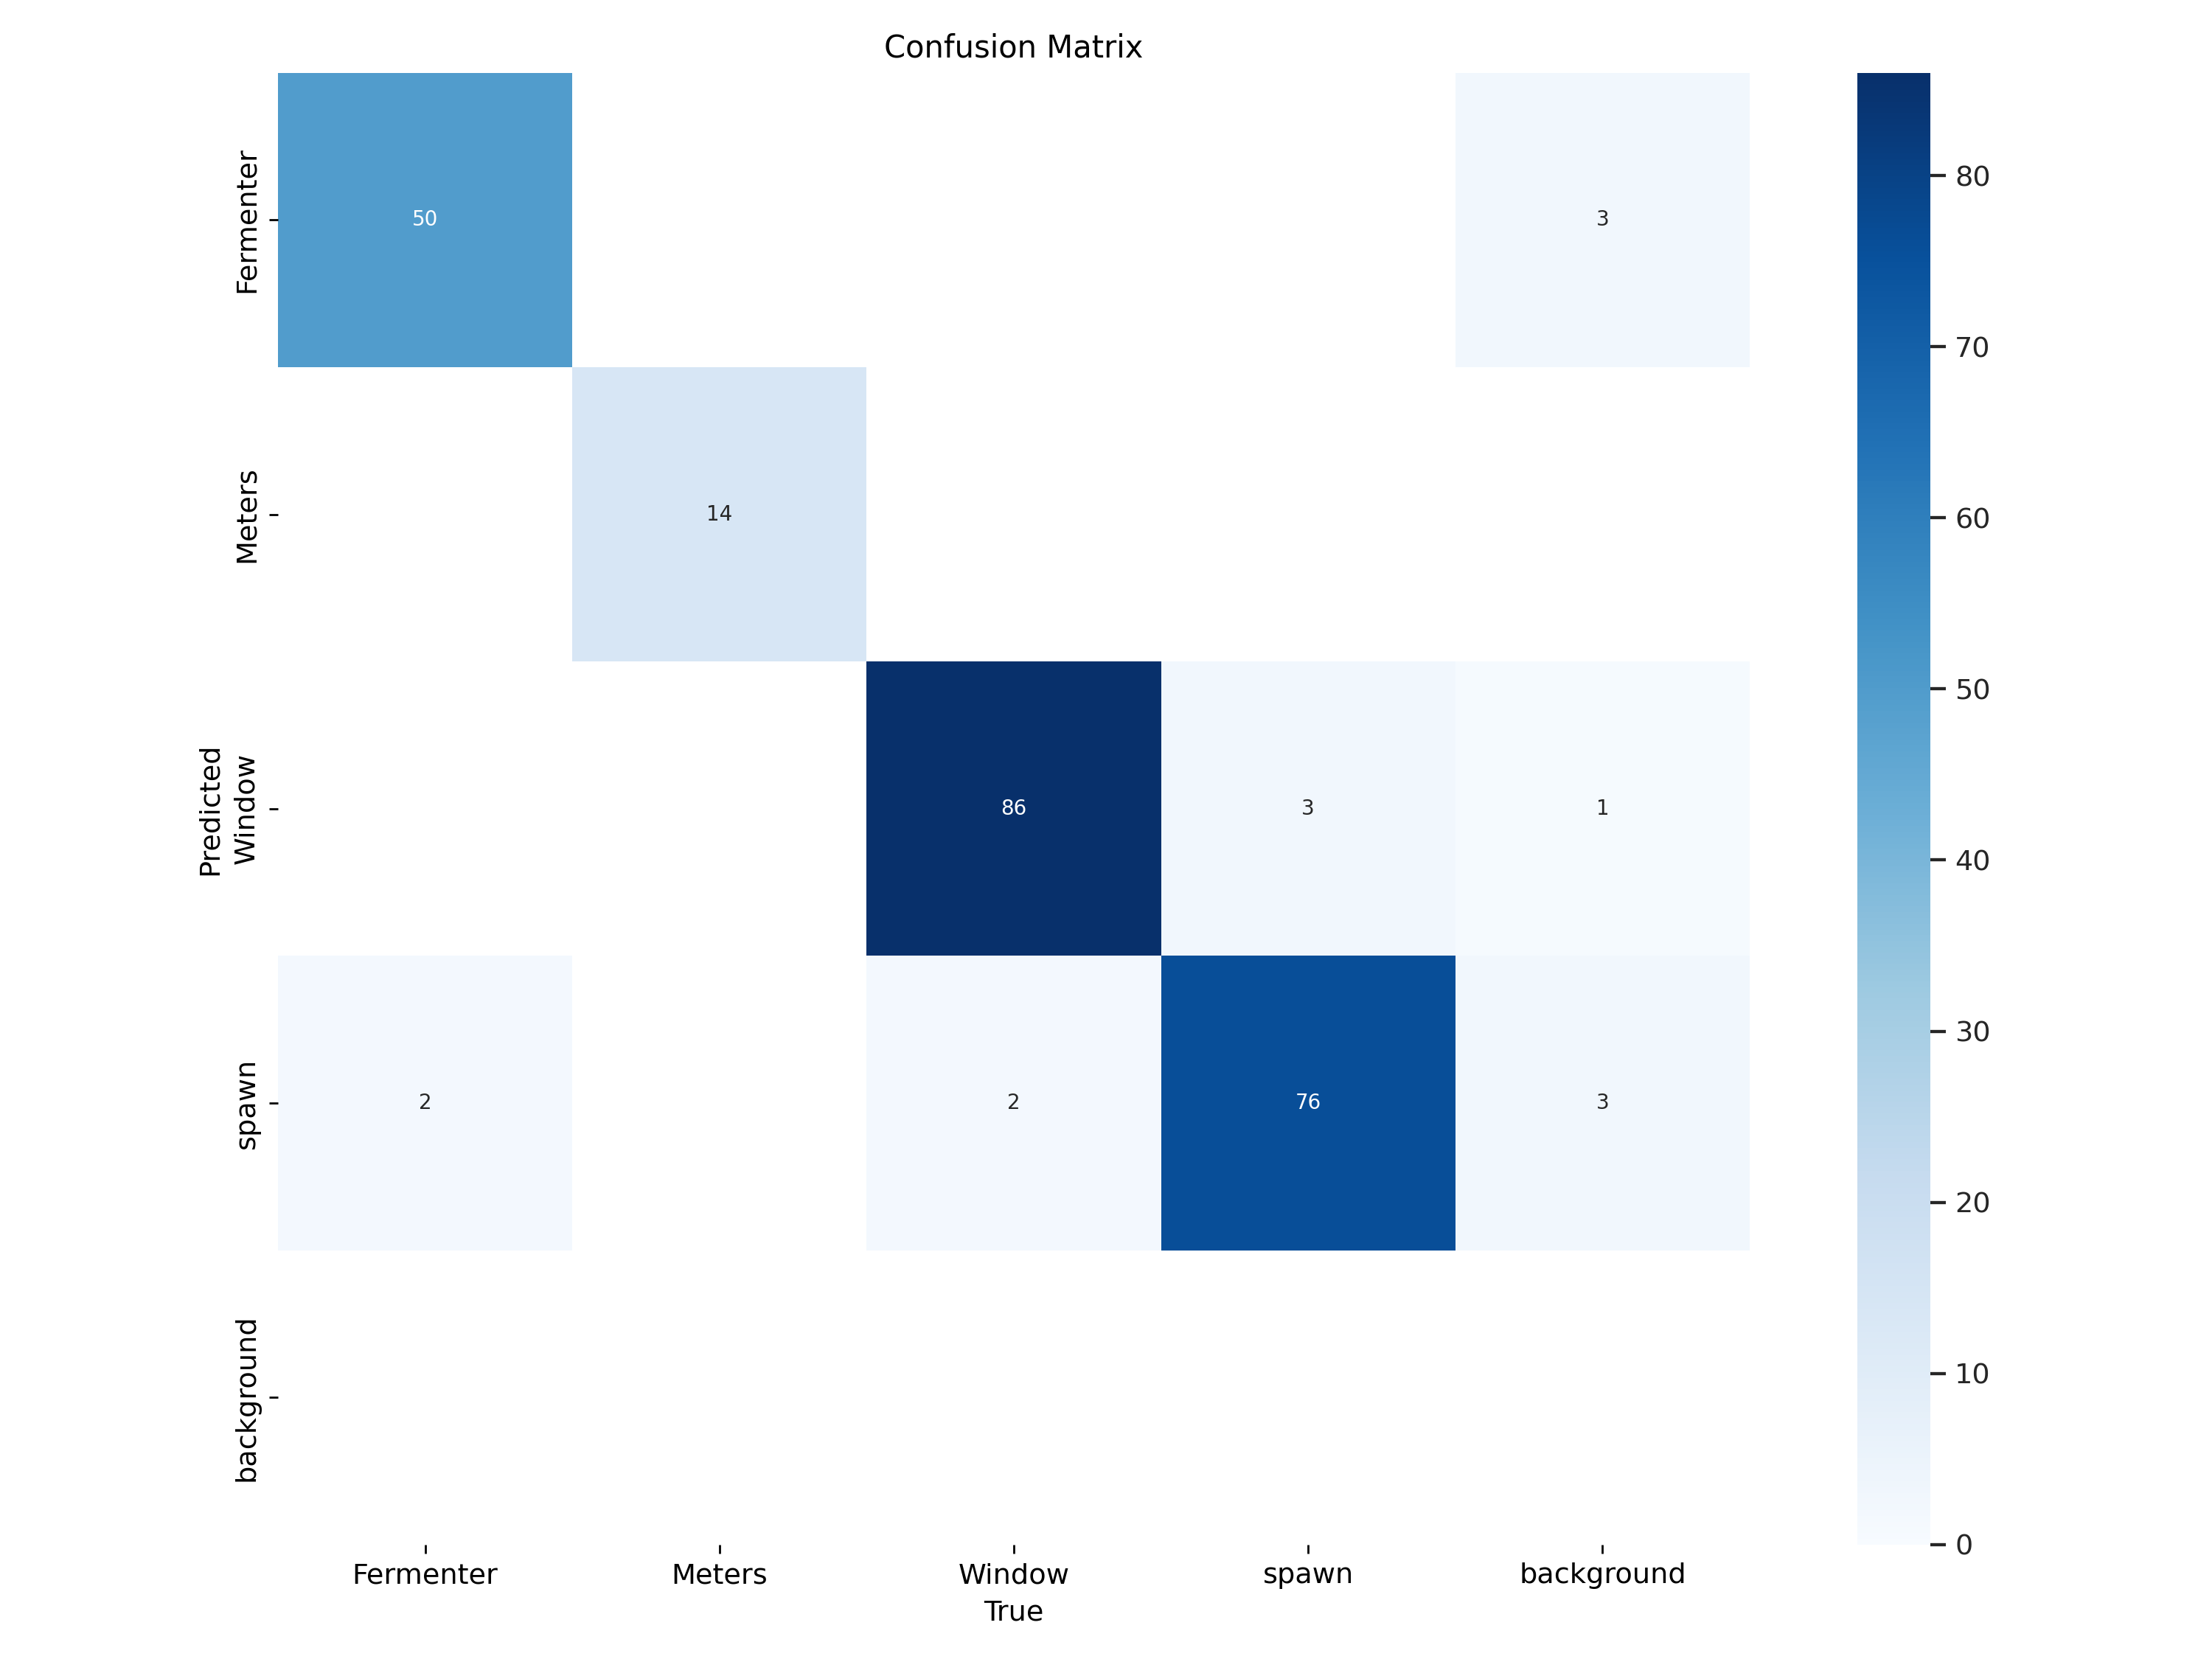

In [7]:
Image(filename=f'/content/runs/segment/train2/confusion_matrix.png', width=600)

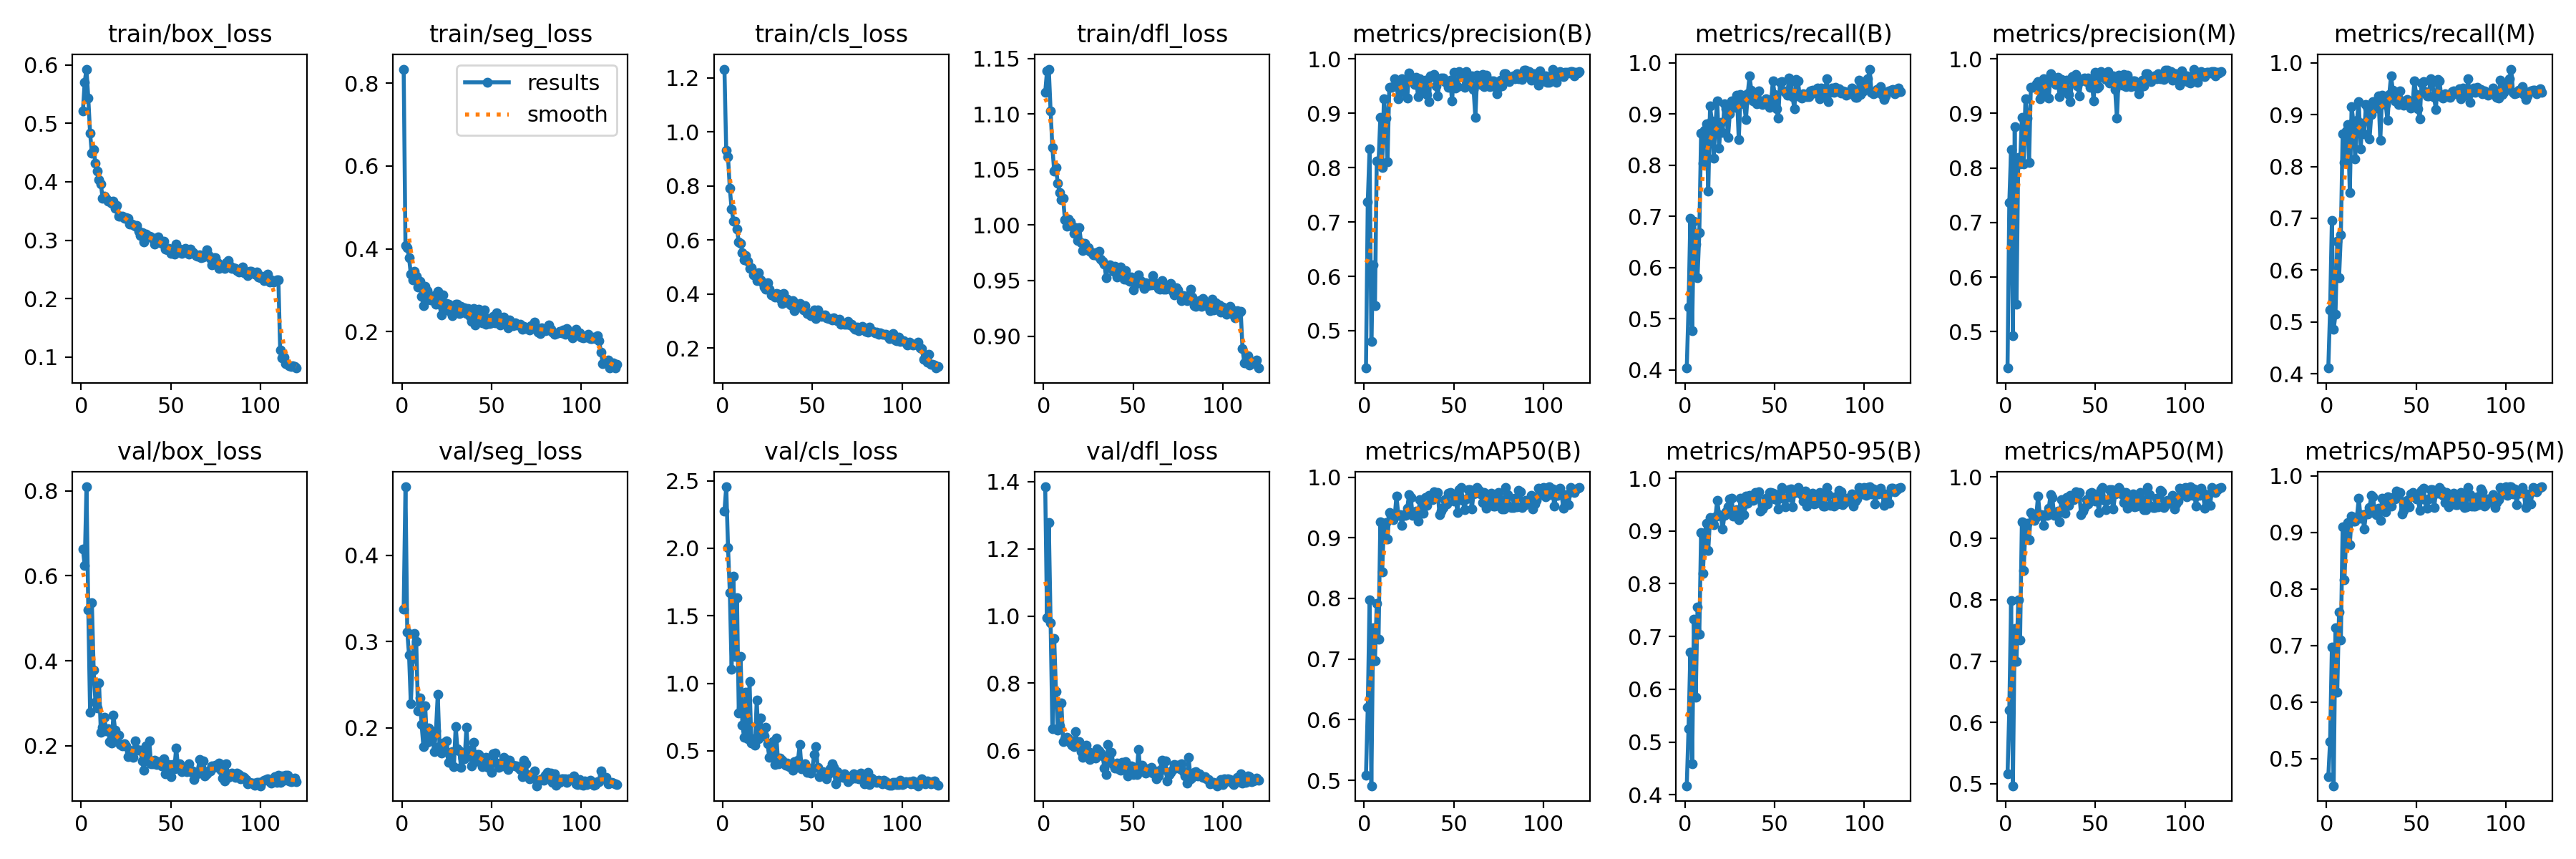

In [8]:
Image(filename=f'/content/runs/segment/train2/results.png', width=600)

In [18]:
!yolo model=/content/runs/segment/train2/weights/last.pt mode=predict source=/content/liquid_spawn_segmentation_data-3/valid/images



NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968

In [ ]:
{dataset.location}

{'/content/liquid_spawn_segmentation_data-3'}

In [19]:
!yolo task=segment mode=predict model=/content/runs/segment/train2/weights/best.pt conf=0.5 source={dataset.location}/test/images save_txt=true save_conf=true


NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968

In [12]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/segment/train2/predict/*.jpg'):
      display(Image(filename=image_path, height=600))
      print("\n")

In [15]:

from google.colab import drive
drive.mount('/content/gdrive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
import shutil
import os

source_directory = '/content/runs/segment'
destination_directory = '/content/gdrive/MyDrive/Fermenter segmentation240119/trainseg'  # Use the existing directory as the parent

# Create the destination directory if it doesn't exist
if not os.path.exists(destination_directory):
    os.makedirs(destination_directory)

# Copy the contents of the source directory into the destination directory
for item in os.listdir(source_directory):
    source_item = os.path.join(source_directory, item)
    destination_item = os.path.join(destination_directory, item)
    if os.path.isdir(source_item):
        shutil.copytree(source_item, destination_item)
    else:
        shutil.copy2(source_item, destination_item)